- Matplotlib
- Some pandas features
- Groupby, Crosstab, Pivot/Pivot Table

# Matplotlib

In [25]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Histogram')

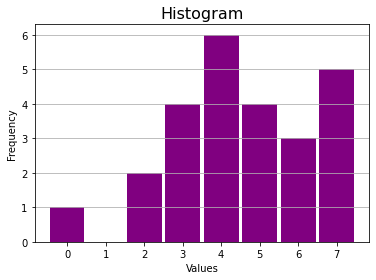

In [91]:
# Histogram - to show distribution
values = [0,4,2,3,5,2,4,4,3,4,3,6,7,5,4,3,5,7,4,9,8,7,6,7,5,6,7]

# plt.hist(values, bins=5, rwidth=0.9, color='purple')  # How to center the bins
plt.hist(values, bins=np.arange( min(values), max(values), 1) - 0.5,  rwidth=0.9, color='purple')  # How to center the bins

plt.grid(axis='y')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram', fontsize=16)

In [38]:
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

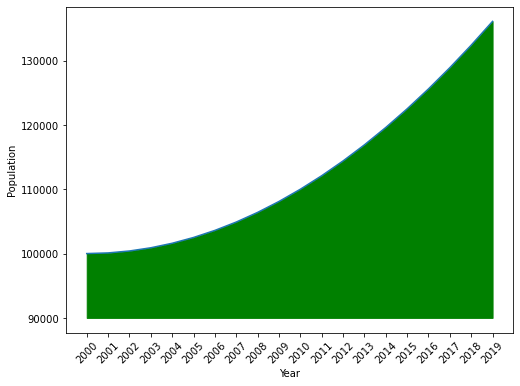

In [46]:
# Line plot - to show trends
year = np.arange(2000, 2020)
population = [ 100000 + 800*np.random.normal(0,1) + x*1000 for x in np.arange(0,20)]
population = [ 100000 + 100*x**2 for x in np.arange(0,20)]

plt.figure(figsize = (8,6))
plt.plot(year, population)
plt.xticks(year, rotation=45);
plt.xlabel('Year')
plt.ylabel('Population')
plt.fill_between(year, population, 90000, color='green')
plt.show()

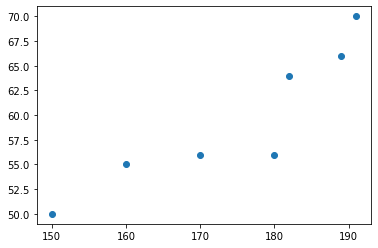

In [48]:
# Scatter plot - to show correlation
height = [150, 160, 170, 180, 182, 189, 191]
weight = [50, 55, 56, 56, 64, 66, 70]

plt.scatter(height, weight)
plt.show()

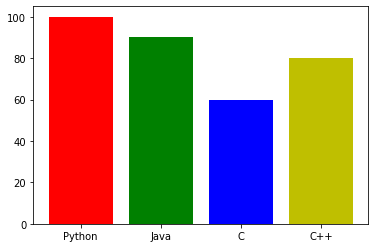

In [51]:
# Barplot - to compare between different categories
categories = ['Python', 'Java', 'C', 'C++']
popularity = [100,90,60,80]

plt.bar(categories, popularity, color=['r', 'g', 'b', 'y'])
plt.show()

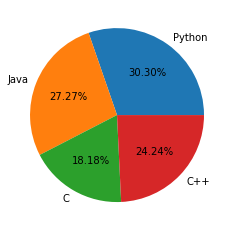

In [57]:
# Pie chart - to show the proportion as a whole
plt.pie(popularity, labels=categories, autopct='%.2f%%')
plt.show()

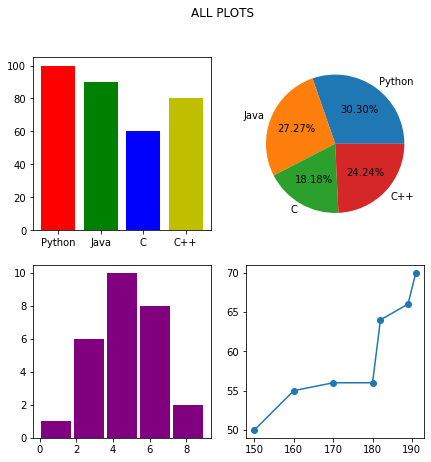

In [76]:
# Multiple Plots
# ax[row number , column number]
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].bar(categories, popularity, color=['r', 'g', 'b', 'y']);
ax[0,1].pie(popularity, labels=categories, autopct='%.2f%%');
ax[1,0].hist(values, bins=5, rwidth=0.9, color='purple');
ax[1,1].scatter(height, weight);
ax[1,1].plot(height, weight);
fig.suptitle('ALL PLOTS')
plt.show()

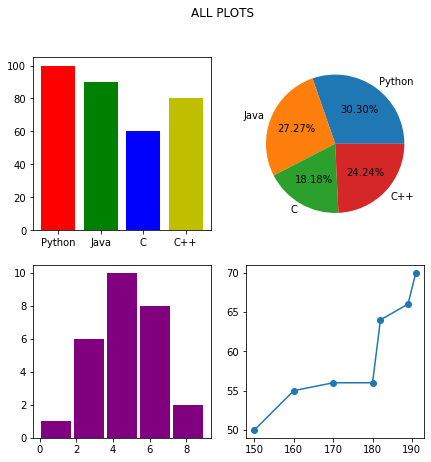

In [92]:
# Multiple Plots
# ax[row number , column number]
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].bar(categories, popularity, color=['r', 'g', 'b', 'y']);
ax[0,1].pie(popularity, labels=categories, autopct='%.2f%%');
ax[1,0].hist(values, bins=5, rwidth=0.9, color='purple');
ax[1,1].scatter(height, weight);
ax[1,1].plot(height, weight);
fig.suptitle('ALL PLOTS')
plt.show()

In [94]:
fig.savefig('Plots.png', dpi=600)


# Some Pandas Features

In [96]:
import pandas as pd

In [98]:
df = pd.read_csv('marks.csv')
df.head()

,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
0,S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
1,S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
2,S03,Charlie,60.753099,65.219548,99.323628,24.281512,58.057612
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
4,S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671


In [117]:
# Load the data
# Set student id as the index
# use only columns student_id, student_name, english, and science
# change the name to gender column

df = pd.read_csv('test/marks.csv', index_col=0, usecols=['Student_ID', 'Student_Name', 'English', 'Science'])

df['Gender'] = df['Student_Name'].str.lower().str.contains('a', 'i')

df['Gender'] = df['Gender'].map({ True:'F', False:'M' })

df = df.rename({'Student_Name':'Name'}, axis=1)

df

,Name,English,Science,Gender
Student_ID,,,,
S01,Alice,96.874050,58.682033,F
S02,Bob,5.462131,83.171957,M
S03,Charlie,60.753099,99.323628,F
S04,David,21.160844,35.860852,F
S05,Edward,63.250994,7.020915,F
S06,Fysal,42.694748,37.216613,F
S07,George,66.276626,14.219533,M
S08,Hareez,5.302984,43.980951,F
S09,Ivan,5.777530,94.559212,F


In [119]:
# np.where
df['Score'] = (df['English'] + df['Science'])/2
df['Grade'] = np.where( df['Score']>80, 'A', np.where(df['Score']>60, 'B', np.where(df['Score']>40, 'C', 'D')) )
df

,Name,English,Science,Gender,Score,Grade
Student_ID,,,,,,
S01,Alice,96.874050,58.682033,F,77.778041,B
S02,Bob,5.462131,83.171957,M,44.317044,C
S03,Charlie,60.753099,99.323628,F,80.038363,A
S04,David,21.160844,35.860852,F,28.510848,D
S05,Edward,63.250994,7.020915,F,35.135954,D
S06,Fysal,42.694748,37.216613,F,39.955681,D
S07,George,66.276626,14.219533,M,40.248080,C
S08,Hareez,5.302984,43.980951,F,24.641968,D
S09,Ivan,5.777530,94.559212,F,50.168371,C


In [120]:
# df.apply
def pass_fail(row):
    if row['Score'] <= 40:
        return 'Fail'
    else:
        return 'Pass'

df['Pass_Fail'] = df.apply(pass_fail, axis=1)
df

,Name,English,Science,Gender,Score,Grade,Pass_Fail
Student_ID,,,,,,,
S01,Alice,96.874050,58.682033,F,77.778041,B,Pass
S02,Bob,5.462131,83.171957,M,44.317044,C,Pass
S03,Charlie,60.753099,99.323628,F,80.038363,A,Pass
S04,David,21.160844,35.860852,F,28.510848,D,Fail
S05,Edward,63.250994,7.020915,F,35.135954,D,Fail
S06,Fysal,42.694748,37.216613,F,39.955681,D,Fail
S07,George,66.276626,14.219533,M,40.248080,C,Pass
S08,Hareez,5.302984,43.980951,F,24.641968,D,Fail
S09,Ivan,5.777530,94.559212,F,50.168371,C,Pass


# Groupby

In [122]:
# Count
df.groupby('Grade').size()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [123]:
df.groupby('Gender').size()

Gender
F    11
M     9
dtype: int64

In [124]:
df.groupby(['Grade', 'Gender']).size()

Grade  Gender
A      F         2
B      F         1
C      F         2
       M         4
D      F         6
       M         5
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, S01 to S20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       20 non-null     object 
 1   English    20 non-null     float64
 2   Science    20 non-null     float64
 3   Gender     20 non-null     object 
 4   Score      20 non-null     float64
 5   Grade      20 non-null     object 
 6   Pass_Fail  20 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [125]:
df.groupby(['Grade']).mean()

,English,Science,Score
Grade,,,
A,78.340760,97.381896,87.861328
B,96.874050,58.682033,77.778041
C,42.233157,55.144404,48.688781
D,29.101881,20.582463,24.842172


In [128]:
g = df.groupby(['Grade', 'Gender']).agg( ['min', 'max', 'mean'] )
g

English                          Science             \
                    min        max       mean        min        max   
Grade Gender                                                          
A     F       60.753099  95.928421  78.340760  95.440164  99.323628   
B     F       96.874050  96.874050  96.874050  58.682033  58.682033   
C     F        5.777530  30.830802  18.304166  84.271650  94.559212   
      M        5.462131  72.833673  54.197652  14.219533  83.171957   
D     F        5.302984  63.250994  26.449213   2.618987  43.980951   
      M        5.982402  43.559963  32.285082   3.312853  40.977224   

                             Score                        
                   mean        min        max       mean  
Grade Gender                                              
A     F       97.381896  80.038363  95.684293  87.861328  
B     F       58.682033  77.778041  77.778041  77.778041  
C     F       89.415431  50.168371  57.551226  53.859798  
      M       38.008891  40.248080  52.386620  46.103272  
D     F       23.869411  10.344626  39.955681  25.159312  
      M       16.638127  17.140792  28.742247  24.461604

In [130]:
# .stack --> this will make dataframe longer (column to row)
g.stack()

English    Science      Score
Grade Gender                                      
A     F      min   60.753099  95.440164  80.038363
             max   95.928421  99.323628  95.684293
             mean  78.340760  97.381896  87.861328
B     F      min   96.874050  58.682033  77.778041
             max   96.874050  58.682033  77.778041
             mean  96.874050  58.682033  77.778041
C     F      min    5.777530  84.271650  50.168371
             max   30.830802  94.559212  57.551226
             mean  18.304166  89.415431  53.859798
      M      min    5.462131  14.219533  40.248080
             max   72.833673  83.171957  52.386620
             mean  54.197652  38.008891  46.103272
D     F      min    5.302984   2.618987  10.344626
             max   63.250994  43.980951  39.955681
             mean  26.449213  23.869411  25.159312
      M      min    5.982402   3.312853  17.140792
             max   43.559963  40.977224  28.742247
             mean  32.285082  16.638127  24.461604

In [133]:
# unstack --> this will make dataframe wider (row to column)
g.unstack('Gender')

English                                                        \
              min                  max                  mean              
Gender          F         M          F          M          F          M   
Grade                                                                     
A       60.753099       NaN  95.928421        NaN  78.340760        NaN   
B       96.874050       NaN  96.874050        NaN  96.874050        NaN   
C        5.777530  5.462131  30.830802  72.833673  18.304166  54.197652   
D        5.302984  5.982402  63.250994  43.559963  26.449213  32.285082   

          Science                                                         \
              min                   max                  mean              
Gender          F          M          F          M          F          M   
Grade                                                                      
A       95.440164        NaN  99.323628        NaN  97.381896        NaN   
B       58.682033        NaN  58.682033        NaN  58.682033        NaN   
C       84.271650  14.219533  94.559212  83.171957  89.415431  38.008891   
D        2.618987   3.312853  43.980951  40.977224  23.869411  16.638127   

            Score                                                         
              min                   max                  mean             
Gender          F          M          F          M          F          M  
Grade                                                                     
A       80.038363        NaN  95.684293        NaN  87.861328        NaN  
B       77.778041        NaN  77.778041        NaN  77.778041        NaN  
C       50.168371  40.248080  57.551226  52.386620  53.859798  46.103272  
D       10.344626  17.140792  39.955681  28.742247  25.159312  24.461604

# Pivot and pivot_table

In [134]:
df

,Name,English,Science,Gender,Score,Grade,Pass_Fail
Student_ID,,,,,,,
S01,Alice,96.874050,58.682033,F,77.778041,B,Pass
S02,Bob,5.462131,83.171957,M,44.317044,C,Pass
S03,Charlie,60.753099,99.323628,F,80.038363,A,Pass
S04,David,21.160844,35.860852,F,28.510848,D,Fail
S05,Edward,63.250994,7.020915,F,35.135954,D,Fail
S06,Fysal,42.694748,37.216613,F,39.955681,D,Fail
S07,George,66.276626,14.219533,M,40.248080,C,Pass
S08,Hareez,5.302984,43.980951,F,24.641968,D,Fail
S09,Ivan,5.777530,94.559212,F,50.168371,C,Pass


In [138]:
# Count
df.groupby('Grade').size()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [139]:
# Make sure index has no duplicate
df.pivot(columns='Grade', values='Grade').count()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [128]:
g = df.groupby(['Grade', 'Gender']).agg( ['min', 'max', 'mean'] )
g

English                          Science             \
                    min        max       mean        min        max   
Grade Gender                                                          
A     F       60.753099  95.928421  78.340760  95.440164  99.323628   
B     F       96.874050  96.874050  96.874050  58.682033  58.682033   
C     F        5.777530  30.830802  18.304166  84.271650  94.559212   
      M        5.462131  72.833673  54.197652  14.219533  83.171957   
D     F        5.302984  63.250994  26.449213   2.618987  43.980951   
      M        5.982402  43.559963  32.285082   3.312853  40.977224   

                             Score                        
                   mean        min        max       mean  
Grade Gender                                              
A     F       97.381896  80.038363  95.684293  87.861328  
B     F       58.682033  77.778041  77.778041  77.778041  
C     F       89.415431  50.168371  57.551226  53.859798  
      M       38.008891  40.248080  52.386620  46.103272  
D     F       23.869411  10.344626  39.955681  25.159312  
      M       16.638127  17.140792  28.742247  24.461604

In [144]:
# using pivot_table
df.pivot_table(index=['Grade', 'Gender'], values=['English', 'Science', 'Score'], aggfunc=['min','max','mean'])


min                              max             \
                English    Science      Score    English    Science   
Grade Gender                                                          
A     F       60.753099  95.440164  80.038363  95.928421  99.323628   
B     F       96.874050  58.682033  77.778041  96.874050  58.682033   
C     F        5.777530  84.271650  50.168371  30.830802  94.559212   
      M        5.462131  14.219533  40.248080  72.833673  83.171957   
D     F        5.302984   2.618987  10.344626  63.250994  43.980951   
      M        5.982402   3.312853  17.140792  43.559963  40.977224   

                              mean                        
                  Score    English    Science      Score  
Grade Gender                                              
A     F       95.684293  78.340760  97.381896  87.861328  
B     F       77.778041  96.874050  58.682033  77.778041  
C     F       57.551226  18.304166  89.415431  53.859798  
      M       52.386620  54.197652  38.008891  46.103272  
D     F       39.955681  26.449213  23.869411  25.159312  
      M       28.742247  32.285082  16.638127  24.461604

# Crosstab

In [138]:
# Count
df.groupby('Grade').size()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [150]:
# Count using value_counts
df['Grade'].value_counts().sort_index()

A     2
B     1
C     6
D    11
Name: Grade, dtype: int64

In [148]:
# Count using crosstab
pd.crosstab(index=df['Grade'], columns='Count')

col_0,Count
Grade,
A,2
B,1
C,6
D,11


In [151]:
pd.crosstab(index=df['Grade'], columns=df['Gender'])

Gender,F,M
Grade,,
A,2,0
B,1,0
C,2,4
D,6,5


In [158]:
df.pivot_table(index='Grade', columns=['Gender'], values='Score', fill_value=0, aggfunc='count')

Gender,F,M
Grade,,
A,2,0
B,1,0
C,2,4
D,6,5


**Pandas Visualization**

<AxesSubplot:xlabel='Grade'>

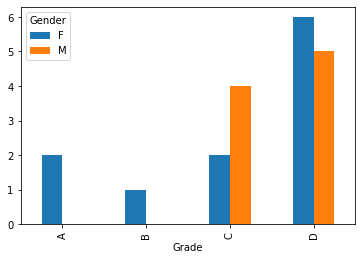

In [173]:
c = pd.crosstab(index=df['Grade'], columns=df['Gender'])
c.plot.bar()

<AxesSubplot:ylabel='Pass_Fail'>

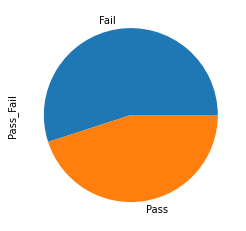

In [163]:
df['Pass_Fail'].value_counts().plot.pie()

<AxesSubplot:xlabel='Grade,Gender'>

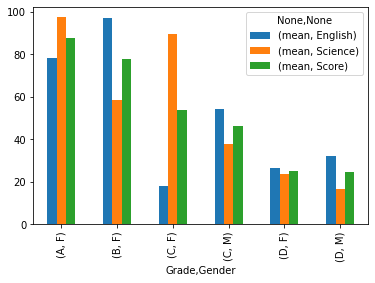

In [171]:
df.pivot_table(index=['Grade', 'Gender'], values=['English', 'Science', 'Score'], aggfunc=['mean']).plot.bar()

<AxesSubplot:xlabel='Grade,Gender'>

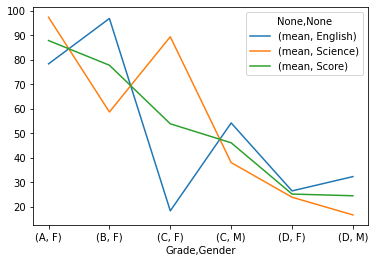

In [172]:
df.pivot_table(index=['Grade', 'Gender'], values=['English', 'Science', 'Score'], aggfunc=['mean']).plot.line()

# Assignment

In [177]:
# 5
df = pd.read_csv('mtcars.csv', usecols=['car_names', 'mpg', 'cyl', 'hp', 'am'], index_col=0)
df

,mpg,cyl,hp,am
car_names,,,,
Mazda RX4,21.0,6,110,1
Mazda RX4 Wag,21.0,6,110,1
Datsun 710,22.8,4,93,1
Hornet 4 Drive,21.4,6,110,0
Hornet Sportabout,18.7,8,175,0
Valiant,18.1,6,105,0
Duster 360,14.3,8,245,0
Merc 240D,24.4,4,62,0
Merc 230,22.8,4,95,0


In [178]:
# 6
import matplotlib.pyplot as plt

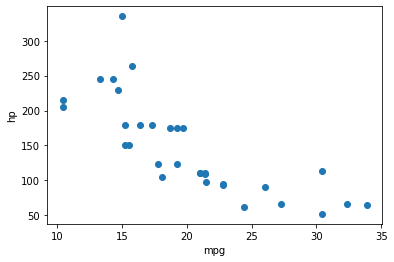

In [181]:
# 7 and 8
plt.scatter(df['mpg'], df['hp'])
plt.xlabel('mpg')
plt.ylabel('hp')
plt.show()

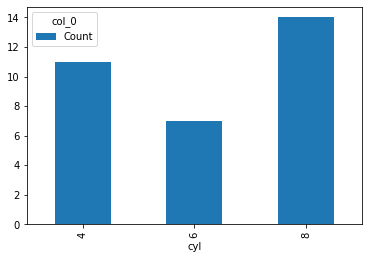

In [184]:
# 9
pd.crosstab(index=df['cyl'], columns='Count').plot.bar();

<AxesSubplot:xlabel='cyl'>

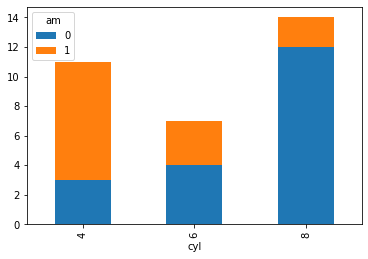

In [187]:
# 10
pd.crosstab(index=df['cyl'], columns=df['am']).plot.bar(stacked=True)